In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 
% matplotlib inline

import sys, os, copy
print("Using environment in "+sys.prefix)
print("Python version "+sys.version)

Using environment in /Users/emunsing/Documents/Coding/github/cdips_hpi_forecast/env
Python version 3.5.2 (default, Oct 31 2016, 16:50:28) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]


In [3]:
inputFiles = {'all': 'Metro_Zhvi_AllHomes.csv',
              'sft': 'Metro_MedianValuePerSqft_AllHomes.csv',
              '1br': 'Metro_Zhvi_1bedroom.csv',
              '2br': 'Metro_Zhvi_2bedroom.csv',
              '3br': 'Metro_Zhvi_3bedroom.csv',
              '4br': 'Metro_Zhvi_4bedroom.csv',
              '5br': 'Metro_Zhvi_5BedroomOrMore.csv',
              'top': 'Metro_Zhvi_TopTier.csv',
              'bottom': 'Metro_Zhvi_BottomTier.csv',
              'condos': 'Metro_Zhvi_Condominum.csv',
              'single': 'Metro_Zhvi_SingleFamilyResidence.csv',
             }

#  Map Zillow RegionID to metro area string
metroRegionID = {'Dallas-Fort Worth, TX':394514,
                     'Atlanta, GA':394347,
                     'Phoenix, AZ':394976,
                     'Las Vegas, NV':394775 }

metroString = {'Dallas':u'Dallas-Fort Worth, TX',
               'Atlanta':u'Atlanta, GA',
               'Phoenix':u'Phoenix, AZ',
               'Vegas':u'Las Vegas, NV'}

orderedColumns = ['top','5br','4br','3br','2br','1br','bottom','condos','single','sft','all']

In [4]:
# Goal: check how prices for each of the houses are correlated for each of the regions.

startDate = '2003-01'
endDate = None

# We'll have a different dataframe for each city, and pull them together in a Dictionary
allCities = {city:pd.DataFrame() for city in metroString.keys()}
allCitiesNormed = copy.deepcopy(allCities)  # This will hold the normalized data


for houseType in inputFiles.keys():
    # Read data into a temporary data file, then pull out the city and time period which we want.
    df = pd.read_csv('Data/ZHVI/'+inputFiles[houseType],index_col=[1])
    df = df.drop(['RegionID','SizeRank'],axis=1)
    df.columns = pd.DatetimeIndex(df.columns)
    
    for city in metroString.keys():
        allCities[city][houseType] = df.loc[ metroString[city],startDate:endDate]
        
# Clean up the data
for city in metroString.keys():
    allCities[city] = allCities[city][orderedColumns]
    allCitiesNormed[city] = allCities[city] / allCities[city].iloc[0,:]

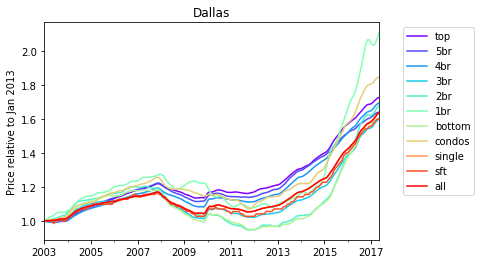

In [5]:
# Plot a single city
allCitiesNormed[city].plot(colormap=cm.rainbow)
plt.ylabel('Price relative to Jan 2013')
plt.title(city)
plt.legend(bbox_to_anchor=(1.3, 1))

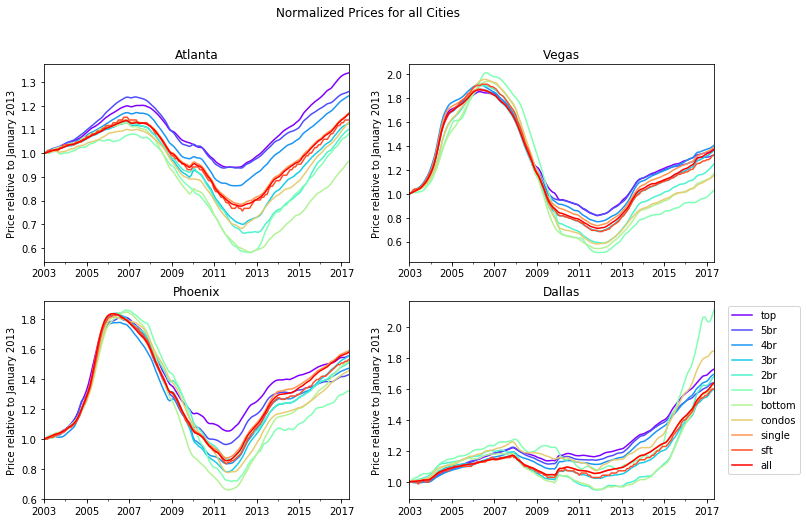

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i in range( len(metroString) ):
    twobits = '{0:02b}'.format(i)
    row = int(twobits[-1])
    col = int(twobits[-2])
    city = list(metroString.keys())[i]

    # Normalized prices
    allCitiesNormed[city].plot(colormap=cm.rainbow, ax=axes[row,col],title=city,legend=None)
    axes[row,col].set_ylabel('Price relative to January 2013')
    
#     # Raw prices
#     allCities[city].plot(colormap=cm.rainbow, ax=axes[row,col],title=city,legend=None)
#     axes[row,col].set_ylabel('Home Price ($)')

plt.suptitle('Normalized Prices for all Cities')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()